# 11时间序列 
python标准库包括用于
* 日期date——datetime
* 时间time——time
* 日历——calendar

In [1]:
from datetime import datetime
# datetime以毫秒形式存储日期和时间。

In [2]:
now = datetime.now()
now

datetime.datetime(2019, 8, 26, 0, 28, 0, 877045)

In [3]:
#timedelta表示两个datetime对象之间的时间差
delta = datetime(2008,1,1) - datetime(2001,1,1,8,15)
delta

datetime.timedelta(days=2555, seconds=56700)

In [4]:
delta.days

2555

In [5]:
delta.seconds

56700

In [6]:
from datetime import timedelta

In [7]:
start = datetime(2001,1,1)

In [8]:
start + timedelta(12)

datetime.datetime(2001, 1, 13, 0, 0)

In [9]:
start + timedelta(0,10000)

datetime.datetime(2001, 1, 1, 2, 46, 40)

datetime模块中的数据类型：
* date     年 月 日
* time     时 分 秒 毫秒
* datetime   日期和时间
* timedelta  两个datetime之间的差

----------
tzinfo 时区信息类型。

## 11.1字符串和datetime的相互转换

In [10]:
#方法一：
date1 = datetime(2019,1,1)
str(date1)

'2019-01-01 00:00:00'

In [11]:
#方法二：
date1.strftime('%Y-%m-%d')

'2019-01-01'

In [12]:
date1.strftime('%Y_%m_%d')

'2019_01_01'

* %Y 4位数的年
* %y 2位数的年
* %m 2位数的月
* %d 2位数的日
------------------------
* %H 24小时制
* %l 12小时制
* %M 2位的分
* %S 秒
* %w 用整数表示的星期几，0 星期天
* %U 每年的第几周。星期天为每周的第一天，第一个周日之前的几天为第0周
* %W 每年的第几周。星期一为每周的第一天，第一个周一之前的几天为第0周
* %z 以+HHMM或-HHMM表示的UTC时区偏移量，
* %F %Y-%m-%d的简写形式
* %D %m%d%y的简写形式
-----------
datetime.strptime 将用这些格式化编码，将字符串转换为日期

In [13]:
#方法1
value = '2019-01-09'
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2019, 1, 9, 0, 0)

In [14]:
datestrs = ['7/6/2019','6/2/2018']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2019, 7, 6, 0, 0), datetime.datetime(2018, 6, 2, 0, 0)]

In [15]:
#方法2
from dateutil.parser import parse

In [16]:
parse('2019-01-29')

datetime.datetime(2019, 1, 29, 0, 0)

In [17]:
parse('Jan 31,1997 10:45 PM')

datetime.datetime(2019, 1, 31, 22, 45)

In [18]:
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

### pandas中的to_datetime方法，可以解析多种日期表示形式。

In [19]:
import pandas as pd

In [20]:
pd.to_datetime(['2019-01-01 08:10:12','2019-02-01 12:12:00'])

DatetimeIndex(['2019-01-01 08:10:12', '2019-02-01 12:12:00'], dtype='datetime64[ns]', freq=None)

In [21]:
datests = ['2019-01-01 08:10:12', '2019-02-01 12:12:00'] + [None]
datestrs

['7/6/2019', '6/2/2018']

In [22]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2019-07-06', '2018-06-02', 'NaT'], dtype='datetime64[ns]', freq=None)

In [23]:
pd.isnull(datestrs)

array([False, False])

In [24]:
pd.isnull(idx)

array([False, False,  True])

## 11.2 时间序列基础

In [25]:
#from datetime import datetime
dates = [datetime(2019,1,x) for x in range(1,10)]
dates

[datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 2, 0, 0),
 datetime.datetime(2019, 1, 3, 0, 0),
 datetime.datetime(2019, 1, 4, 0, 0),
 datetime.datetime(2019, 1, 5, 0, 0),
 datetime.datetime(2019, 1, 6, 0, 0),
 datetime.datetime(2019, 1, 7, 0, 0),
 datetime.datetime(2019, 1, 8, 0, 0),
 datetime.datetime(2019, 1, 9, 0, 0)]

In [26]:
import numpy as np
ts = pd.Series(np.random.randn(9),index = dates)
ts

2019-01-01   -0.584920
2019-01-02    1.845424
2019-01-03   -0.200880
2019-01-04   -0.482005
2019-01-05    0.066246
2019-01-06   -0.006512
2019-01-07    0.345003
2019-01-08   -0.143986
2019-01-09    0.152531
dtype: float64

In [27]:
ts.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09'],
              dtype='datetime64[ns]', freq=None)

In [28]:
ts.index[0]

Timestamp('2019-01-01 00:00:00')

### 索引、选取、子集构造

In [29]:
stamp = ts.index[2]
print(ts)
print(stamp)

2019-01-01   -0.584920
2019-01-02    1.845424
2019-01-03   -0.200880
2019-01-04   -0.482005
2019-01-05    0.066246
2019-01-06   -0.006512
2019-01-07    0.345003
2019-01-08   -0.143986
2019-01-09    0.152531
dtype: float64
2019-01-03 00:00:00


In [30]:
ts[stamp]

-0.200879575249899

In [31]:
ts['20190102']

1.8454241442231758

In [32]:
longer_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2019',periods=1000))
longer_ts.head()

2019-01-01    0.628498
2019-01-02   -0.152904
2019-01-03    0.493979
2019-01-04   -1.452789
2019-01-05    0.304137
Freq: D, dtype: float64

In [33]:
longer_ts['2019']

2019-01-01    0.628498
2019-01-02   -0.152904
2019-01-03    0.493979
2019-01-04   -1.452789
2019-01-05    0.304137
2019-01-06   -1.788681
2019-01-07   -0.723659
2019-01-08   -1.118448
2019-01-09    1.769919
2019-01-10    0.346119
2019-01-11   -0.210548
2019-01-12    0.043394
2019-01-13    0.331263
2019-01-14   -1.280882
2019-01-15   -0.633739
2019-01-16    1.369005
2019-01-17    0.187663
2019-01-18   -1.399844
2019-01-19    0.684675
2019-01-20    1.219131
2019-01-21    0.143120
2019-01-22   -0.403197
2019-01-23   -1.357108
2019-01-24   -1.260496
2019-01-25    1.643967
2019-01-26    0.034910
2019-01-27   -0.864718
2019-01-28   -1.093205
2019-01-29   -0.976459
2019-01-30   -0.947698
                ...   
2019-12-02    0.683100
2019-12-03    0.094132
2019-12-04   -1.419891
2019-12-05    0.467495
2019-12-06    1.501715
2019-12-07    0.267925
2019-12-08    0.577106
2019-12-09   -0.498146
2019-12-10    0.374557
2019-12-11   -0.459920
2019-12-12    0.316469
2019-12-13   -2.078775
2019-12-14 

In [34]:
longer_ts['2019-02']

2019-02-01   -0.376019
2019-02-02   -0.511907
2019-02-03    1.126011
2019-02-04   -0.477534
2019-02-05    0.161236
2019-02-06    0.335568
2019-02-07   -0.267791
2019-02-08    0.897024
2019-02-09   -0.970865
2019-02-10    0.312888
2019-02-11   -0.517699
2019-02-12    0.576098
2019-02-13    0.757047
2019-02-14   -0.578470
2019-02-15    0.185791
2019-02-16    0.758916
2019-02-17    1.115120
2019-02-18   -2.479119
2019-02-19   -0.169801
2019-02-20   -1.075906
2019-02-21    1.062500
2019-02-22    0.052501
2019-02-23    0.676976
2019-02-24   -1.323205
2019-02-25   -0.126305
2019-02-26    2.021041
2019-02-27   -0.134590
2019-02-28    1.281331
Freq: D, dtype: float64

In [35]:
longer_ts[:'20190201']

2019-01-01    0.628498
2019-01-02   -0.152904
2019-01-03    0.493979
2019-01-04   -1.452789
2019-01-05    0.304137
2019-01-06   -1.788681
2019-01-07   -0.723659
2019-01-08   -1.118448
2019-01-09    1.769919
2019-01-10    0.346119
2019-01-11   -0.210548
2019-01-12    0.043394
2019-01-13    0.331263
2019-01-14   -1.280882
2019-01-15   -0.633739
2019-01-16    1.369005
2019-01-17    0.187663
2019-01-18   -1.399844
2019-01-19    0.684675
2019-01-20    1.219131
2019-01-21    0.143120
2019-01-22   -0.403197
2019-01-23   -1.357108
2019-01-24   -1.260496
2019-01-25    1.643967
2019-01-26    0.034910
2019-01-27   -0.864718
2019-01-28   -1.093205
2019-01-29   -0.976459
2019-01-30   -0.947698
2019-01-31   -0.793214
2019-02-01   -0.376019
Freq: D, dtype: float64

In [36]:
longer_ts.index.is_unique

True

### 带有重复索引的时间序列

In [37]:
longer_ts.groupby(by=longer_ts.index.year).sum()

2019    3.142487
2020   -9.794692
2021   -0.823423
dtype: float64


## 11.3日期的范围、频率以及移动

In [38]:
#WOM-2MON为基本的时间序列频率
ts = pd.date_range(start='20190101',freq='WOM-2MON',periods=5)
ts

DatetimeIndex(['2019-01-14', '2019-02-11', '2019-03-11', '2019-04-08',
               '2019-05-13'],
              dtype='datetime64[ns]', freq='WOM-2MON')

### 频率和日期偏移量
pandas中的频移是 由一个基础频率和一个乘数组成。基础频率以一个字符串组成，M 表示月， H 表示每小时，

In [39]:
pd.date_range('20190101','20190102',freq='4h')

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 04:00:00',
               '2019-01-01 08:00:00', '2019-01-01 12:00:00',
               '2019-01-01 16:00:00', '2019-01-01 20:00:00',
               '2019-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [40]:
from pandas.tseries.offsets import Hour,Minute

In [41]:
hour = Hour(4)

In [42]:
pd.date_range('20190101','20190102',freq=hour)

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 04:00:00',
               '2019-01-01 08:00:00', '2019-01-01 12:00:00',
               '2019-01-01 16:00:00', '2019-01-01 20:00:00',
               '2019-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

### WOM日期

In [43]:
td=pd.date_range('20190101','20190503',freq='WOM-3FRI')
td

DatetimeIndex(['2019-01-18', '2019-02-15', '2019-03-15', '2019-04-19'], dtype='datetime64[ns]', freq='WOM-3FRI')

In [44]:
list(td)

[Timestamp('2019-01-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2019-02-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2019-03-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2019-04-19 00:00:00', freq='WOM-3FRI')]

### 移动数据
移动 是指 沿着时间轴将数据前移或后移。
Series和DataFrame都有一个shift方法，用于执行单纯的前移或后移操作，保持索引不变。

In [45]:
ts = pd.Series(np.random.randn(4),
              index=pd.date_range('20190101',periods=4,
              freq='M'))
ts

2019-01-31    1.357536
2019-02-28    0.430438
2019-03-31    0.389659
2019-04-30    0.452099
Freq: M, dtype: float64

In [46]:
#单纯的移位不会修改索引。部分数据会被丢弃。
ts.shift(2)

2019-01-31         NaN
2019-02-28         NaN
2019-03-31    1.357536
2019-04-30    0.430438
Freq: M, dtype: float64

In [47]:
ts.shift(-2)

2019-01-31    0.389659
2019-02-28    0.452099
2019-03-31         NaN
2019-04-30         NaN
Freq: M, dtype: float64

In [48]:
ts / ts.shift(1) -1

2019-01-31         NaN
2019-02-28   -0.682927
2019-03-31   -0.094737
2019-04-30    0.160241
Freq: M, dtype: float64

In [49]:
#对时间戳进行移位，对数据不移动。
ts.shift(2,freq='M')

2019-03-31    1.357536
2019-04-30    0.430438
2019-05-31    0.389659
2019-06-30    0.452099
Freq: M, dtype: float64

In [50]:
ts.shift(1,freq='2D')

2019-02-02    1.357536
2019-03-02    0.430438
2019-04-02    0.389659
2019-05-02    0.452099
dtype: float64

In [51]:
ts.shift(1,freq='90T')

2019-01-31 01:30:00    1.357536
2019-02-28 01:30:00    0.430438
2019-03-31 01:30:00    0.389659
2019-04-30 01:30:00    0.452099
Freq: M, dtype: float64

### 通过偏移量对日期进行位移
pandas的日偏移量还可以用在datetime或Timestamp上

In [52]:
from pandas.tseries.offsets import Day,MonthEnd

In [53]:
now = datetime(2011,11,17)

In [54]:
now + 3 *Day()

Timestamp('2011-11-20 00:00:00')

In [55]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [56]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [57]:
offset= MonthEnd()
offset

<MonthEnd>

In [58]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [59]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

## 11.4时区处理
* pytz库

In [60]:
import pytz

In [61]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [62]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### 时区本地化和转换

## 11.5时期及其算术运算

In [63]:
p = pd.Period(2019,freq='A-DEC')
p

Period('2019', 'A-DEC')

In [64]:
p + 5

Period('2024', 'A-DEC')

In [65]:
pd.Period(2025,freq='A-DEC') - p

<6 * YearEnds: month=12>

In [66]:
#period_range函数可用于创建规则的时期范围。
rng = pd.period_range('20190101','20190301',freq='M')
rng

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]', freq='M')

In [68]:
#PeriodIndex类
pd.Series(np.random.randn(3),index=rng)

2019-01   -0.920245
2019-02    1.190058
2019-03   -0.349729
Freq: M, dtype: float64

### 时期的频率转换
Period和PeriodIndex对象都可以通过asfreq方法被转换成别的频率。

In [69]:
#将一个年度时期，转换为当年年初或年末的一个月度时期。
p=pd.Period('2007',freq='A-DEC')
p

Period('2007', 'A-DEC')

In [71]:
p.asfreq('M',how='start')


Period('2007-01', 'M')

In [72]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [73]:
p = pd.Period('20190201',freq='A-JUN')
p

Period('2019', 'A-JUN')

In [74]:
p.asfreq('M','start')

Period('2018-07', 'M')

In [75]:
p.asfreq('M','end')

Period('2019-06', 'M')

In [76]:
#完整的PeriodIndex和TimeSeries的频率转换也是这样的。
rng = pd.period_range('2006','2009',freq='A-DEC')
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]', freq='A-DEC')

In [77]:
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2006    0.136212
2007   -1.574202
2008    0.295109
2009   -0.785393
Freq: A-DEC, dtype: float64

In [85]:
ts.asfreq('M',how = 'start')

2006-01    0.136212
2007-01   -1.574202
2008-01    0.295109
2009-01   -0.785393
Freq: M, dtype: float64

### 按季度计算的时期频率

In [88]:
p = pd.Period('2019Q4',freq='Q-JAN')
p

Period('2019Q4', 'Q-JAN')

In [87]:
p = pd.Period('2019Q3',freq='Q-JAN')
p

Period('2019Q3', 'Q-JAN')

In [89]:
p4pm = (p.asfreq('B','e') - 1).asfreq('T','s') + 16 * 60
p4pm

Period('2019-01-30 16:00', 'T')

In [90]:
p4pm.to_timestamp()

Timestamp('2019-01-30 16:00:00')

### 将Timestamp转换为Period

In [91]:
rng = pd.date_range('20190101',periods=3,freq='M')
rng

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31'], dtype='datetime64[ns]', freq='M')

In [92]:
ts = pd.Series(np.random.randn(3),index=rng)
ts

2019-01-31   -2.009093
2019-02-28    0.264762
2019-03-31    1.088073
Freq: M, dtype: float64

In [93]:
pts = ts.to_period()
pts

2019-01   -2.009093
2019-02    0.264762
2019-03    1.088073
Freq: M, dtype: float64

In [94]:
ts.to_period('M')

2019-01   -2.009093
2019-02    0.264762
2019-03    1.088073
Freq: M, dtype: float64

In [96]:
pts.to_timestamp(how='end')

2019-01-31 23:59:59.999999999   -2.009093
2019-02-28 23:59:59.999999999    0.264762
2019-03-31 23:59:59.999999999    1.088073
Freq: M, dtype: float64

### 通过数组创建PeriodIndex

In [97]:
data = pd.read_csv('macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [98]:
data.year[:5]

0    1959.0
1    1959.0
2    1959.0
3    1959.0
4    1960.0
Name: year, dtype: float64

In [99]:
data.quarter[:5]

0    1.0
1    2.0
2    3.0
3    4.0
4    1.0
Name: quarter, dtype: float64

In [100]:
#合并两个列
index = pd.PeriodIndex(year=data.year,
                      quarter=data.quarter,
                      freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [101]:
data.index = index
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## 11.6重采样及频率转换
重采样resampling指的是将时间序列从一个频率转换到另一个频率的处理过程。
* 将高频数据聚合到低频率称为降采样downsampling；
* 将低频率数据转换到高频率则称为升采样upsampling。


In [102]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.resample('M').mean()
ts.resample('M', kind='period').mean()

2000-01   -0.042293
2000-02   -0.156148
2000-03    0.133756
2000-04    0.236806
Freq: M, dtype: float64

In [103]:
### 降采样
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
print(ts)
ts.resample('5min', closed='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32


1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [104]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [105]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [106]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [107]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [108]:
# 升采样和插值
ts.resample('5min').ohlc()


,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [111]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.053536,-0.015637,-0.070949,0.344035
2001,-0.356901,0.356479,-0.141587,-0.232787


In [113]:
## 11.7移动窗口函数
close_px_all = pd.read_csv('stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

In [114]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

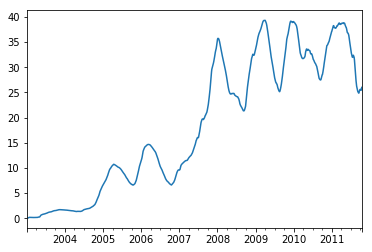

In [116]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()

In [117]:
expanding_mean = appl_std250.expanding().mean()

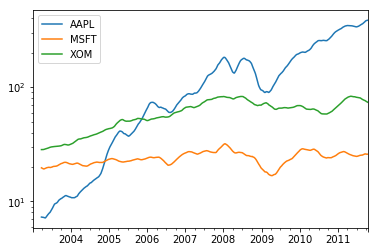

In [119]:
close_px.rolling(60).mean().plot(logy=True)

In [120]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000
